# Data Wrangling II operations using Python..(e.g.,Academic_Performance.csv)

                                                                  -By Aditya Nikam(TE AI & DS)

1.Scan all variables for missing values and inconsistencies. If there are
missing values and/or inconsistencies, use any of the suitable techniques to
deal with them(using median and 0).Apply for single column and whole
dataset.

2.Scan all numeric variables for outliers. If there are outliers,any of the
suitable techniques to deal with them.(using IQR)

3.Display and Remove the outliers show q1 and q3

4.Apply aggregation function (max,avg). The purpose of this
transformation should be one of the following reasons: to change the scale
for better understanding of the variable, to convert a non-linear relation into
a linear one, or to decrease the skewness and convert the distribution into a
normal distribution. Reason and document your approach properly.

5.Draw Scatter plot

In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')#we use this to ignore the warnings means in the output warnings should not appear

C:\Users\champ\PycharmProjects\Tutorials\a\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.8.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\champ\PycharmProjects\Tutorials\a\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df=pd.read_csv(r"C:\Users\champ\Downloads\AcademicPerformance_New.csv")#this is to import the dataset.
#The dataset is a csv file.df is the name given to the dataset
df#this is written to display the dataset

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95.0,USA,79.0,NaN,NaN,26.333333,A,No
95,96.0,Japan,78.0,81.0,82.0,80.333333,A,No
96,97.0,USA,65.0,66.0,62.0,64.333333,B,No
97,98.0,Rassia,63.0,72.0,70.0,68.333333,B,Yes


In [3]:
df.info()#It gives the summary of the dataframe and it tells how many non null values are there in each column ,what 
#is the data type of each coloumn,how many columns are there in the dataset
#Here we cans ee that in our dataset there are 8 coloumns where 3 coloumns have object Datatype
#5 coloumns have float data type

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99 entries, 0 to 98
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Roll No      98 non-null     float64
 1   NationalITy  98 non-null     object 
 2   WT           91 non-null     float64
 3   DSBDA        95 non-null     float64
 4   AI           89 non-null     float64
 5   Average      98 non-null     float64
 6   Grade        98 non-null     object 
 7   PG           98 non-null     object 
dtypes: float64(5), object(3)
memory usage: 6.3+ KB


In [4]:
df.head()

,Roll No,NationalITy,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No


In [5]:
#Now we want to rename the column named "NationalITy" to "Nationality"
df=df.rename(columns={"NationalITy":"Nationality"})
df

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1.0,India,72.0,72.0,74.0,72.666667,C,Yes
1,2.0,Japan,69.0,90.0,NaN,53.000000,B,No
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,China,47.0,NaN,44.0,30.333333,D,Yes
4,5.0,India,76.0,78.0,NaN,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95.0,USA,79.0,NaN,NaN,26.333333,A,No
95,96.0,Japan,78.0,81.0,82.0,80.333333,A,No
96,97.0,USA,65.0,66.0,62.0,64.333333,B,No
97,98.0,Rassia,63.0,72.0,70.0,68.333333,B,Yes


In [6]:
df.isnull().sum()#This displays the number of null values in each column

Roll No         1
Nationality     1
WT              8
DSBDA           4
AI             10
Average         1
Grade           1
PG              1
dtype: int64

In [7]:
#Lets start by filling the Roll Number column we can see in dataset after roll no 2 the next value is null which
#is the only null value here in this dataset for Roll Number so we write the below comman
df["Roll No"]=df.index+1#Here I have filled the null value of Roll Number column
#df.index starts the indexing in your dataset from 0 but you want numbering to start from 1 so we
#have done plus one and we have written "Roll No" because we want to changes in Roll No column only
df

#If you are thinking to fill Roll No column manually using fillna()method then thats wrong and will cause an error
#beacuse fillna()cannot be used to fill a single value only

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1,India,72.0,72.0,74.0,72.666667,C,Yes
1,2,Japan,69.0,90.0,NaN,53.000000,B,No
2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,China,47.0,NaN,44.0,30.333333,D,Yes
4,5,India,76.0,78.0,NaN,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95,USA,79.0,NaN,NaN,26.333333,A,No
95,96,Japan,78.0,81.0,82.0,80.333333,A,No
96,97,USA,65.0,66.0,62.0,64.333333,B,No
97,98,Rassia,63.0,72.0,70.0,68.333333,B,Yes


In [8]:
df["Nationality"].mode()#Here we are finding the mode of the Nationality column means which Nationallity has most occurences
#in our dataset

0    USA
Name: Nationality, dtype: object

In [9]:
df["Nationality"]=df["Nationality"].replace(np.nan,df["Nationality"].mode()[0])
df#Here we are replacing the missing value of Nationallity column with the mode value of Nationality column

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1,India,72.0,72.0,74.0,72.666667,C,Yes
1,2,Japan,69.0,90.0,NaN,53.000000,B,No
2,3,USA,NaN,NaN,NaN,NaN,NaN,NaN
3,4,China,47.0,NaN,44.0,30.333333,D,Yes
4,5,India,76.0,78.0,NaN,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95,USA,79.0,NaN,NaN,26.333333,A,No
95,96,Japan,78.0,81.0,82.0,80.333333,A,No
96,97,USA,65.0,66.0,62.0,64.333333,B,No
97,98,Rassia,63.0,72.0,70.0,68.333333,B,Yes


In [10]:
df["PG"].mode()#Here we are finding the mode of the PG column means which PG has most occurences
#in our dataset

0     No
1    Yes
Name: PG, dtype: object

In [11]:
df["PG"]=df["PG"].replace(np.nan,df["PG"].mode()[0])
df#Here we are replacing the missing value of PG column with the mode value of PG column

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1,India,72.0,72.0,74.0,72.666667,C,Yes
1,2,Japan,69.0,90.0,NaN,53.000000,B,No
2,3,USA,NaN,NaN,NaN,NaN,NaN,No
3,4,China,47.0,NaN,44.0,30.333333,D,Yes
4,5,India,76.0,78.0,NaN,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95,USA,79.0,NaN,NaN,26.333333,A,No
95,96,Japan,78.0,81.0,82.0,80.333333,A,No
96,97,USA,65.0,66.0,62.0,64.333333,B,No
97,98,Rassia,63.0,72.0,70.0,68.333333,B,Yes


In [12]:
df.isnull().sum()#This displays the number of null values in each column

Roll No         0
Nationality     0
WT              8
DSBDA           4
AI             10
Average         1
Grade           1
PG              0
dtype: int64

In [13]:
df["WT"].mean()#here we are calculating the average(mean)of the WT column

61.16483516483517

In [14]:
df["WT"]=df["WT"].replace(np.nan,df["WT"].mean())
df#We are replacing the missing values of WT column with the mean value of WT column

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1,India,72.000000,72.0,74.0,72.666667,C,Yes
1,2,Japan,69.000000,90.0,NaN,53.000000,B,No
2,3,USA,61.164835,NaN,NaN,NaN,NaN,No
3,4,China,47.000000,NaN,44.0,30.333333,D,Yes
4,5,India,76.000000,78.0,NaN,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95,USA,79.000000,NaN,NaN,26.333333,A,No
95,96,Japan,78.000000,81.0,82.0,80.333333,A,No
96,97,USA,65.000000,66.0,62.0,64.333333,B,No
97,98,Rassia,63.000000,72.0,70.0,68.333333,B,Yes


In [15]:
df["DSBDA"].median()#here we are calculating the median value of the DSBDA column

66.0

In [16]:
df["DSBDA"]=df["DSBDA"].replace(np.nan,df["DSBDA"].median())
df#We are replacing the missing values of DSBDA column with the mean value of DSBDA column

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1,India,72.000000,72.0,74.0,72.666667,C,Yes
1,2,Japan,69.000000,90.0,NaN,53.000000,B,No
2,3,USA,61.164835,66.0,NaN,NaN,NaN,No
3,4,China,47.000000,66.0,44.0,30.333333,D,Yes
4,5,India,76.000000,78.0,NaN,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95,USA,79.000000,66.0,NaN,26.333333,A,No
95,96,Japan,78.000000,81.0,82.0,80.333333,A,No
96,97,USA,65.000000,66.0,62.0,64.333333,B,No
97,98,Rassia,63.000000,72.0,70.0,68.333333,B,Yes


In [17]:
df["AI"].median()#here we are calculating the median value of the AI column

63.0

In [18]:
df["AI"]=df["AI"].replace(np.nan,df["AI"].median())
df#We are replacing the missing values of AI column with the median value of AI column

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1,India,72.000000,72.0,74.0,72.666667,C,Yes
1,2,Japan,69.000000,90.0,63.0,53.000000,B,No
2,3,USA,61.164835,66.0,63.0,NaN,NaN,No
3,4,China,47.000000,66.0,44.0,30.333333,D,Yes
4,5,India,76.000000,78.0,63.0,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95,USA,79.000000,66.0,63.0,26.333333,A,No
95,96,Japan,78.000000,81.0,82.0,80.333333,A,No
96,97,USA,65.000000,66.0,62.0,64.333333,B,No
97,98,Rassia,63.000000,72.0,70.0,68.333333,B,Yes


In [19]:
df["Average"].mean()#here we are calculating the average(mean)of the Average column

58.66326530611529

In [20]:
df["Average"]=df["Average"].replace(np.nan,df["Average"].mean())
df#We are replacing the missing values of Average column with the mean value of Average column

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1,India,72.000000,72.0,74.0,72.666667,C,Yes
1,2,Japan,69.000000,90.0,63.0,53.000000,B,No
2,3,USA,61.164835,66.0,63.0,58.663265,NaN,No
3,4,China,47.000000,66.0,44.0,30.333333,D,Yes
4,5,India,76.000000,78.0,63.0,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95,USA,79.000000,66.0,63.0,26.333333,A,No
95,96,Japan,78.000000,81.0,82.0,80.333333,A,No
96,97,USA,65.000000,66.0,62.0,64.333333,B,No
97,98,Rassia,63.000000,72.0,70.0,68.333333,B,Yes


In [21]:
df["Grade"].mode()#here we are calculating the mode of Grade column

0    D
Name: Grade, dtype: object

In [22]:
df["Grade"]=df["Grade"].replace(np.nan,df["Grade"].mode()[0])
df#Here we are finding the mode of the Grade column means which Grade has most occurences
#in our dataset

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1,India,72.000000,72.0,74.0,72.666667,C,Yes
1,2,Japan,69.000000,90.0,63.0,53.000000,B,No
2,3,USA,61.164835,66.0,63.0,58.663265,D,No
3,4,China,47.000000,66.0,44.0,30.333333,D,Yes
4,5,India,76.000000,78.0,63.0,51.333333,C,No
...,...,...,...,...,...,...,...,...
94,95,USA,79.000000,66.0,63.0,26.333333,A,No
95,96,Japan,78.000000,81.0,82.0,80.333333,A,No
96,97,USA,65.000000,66.0,62.0,64.333333,B,No
97,98,Rassia,63.000000,72.0,70.0,68.333333,B,Yes


In [23]:
df.isnull().sum()#We have fill null values in every column now there are no null values in our dataset

Roll No        0
Nationality    0
WT             0
DSBDA          0
AI             0
Average        0
Grade          0
PG             0
dtype: int64

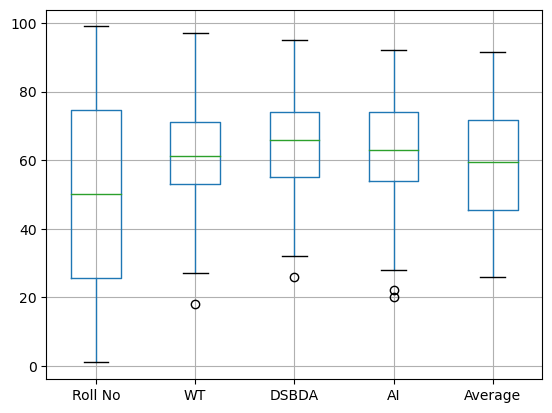

In [31]:
import matplotlib.pyplot as plt
df.boxplot()#this line plot box plots for all numeric columns of the dataset it and it also shows outliers and it 
#uses IQR technique to show outliers.It calculates Q1 and Q3 for respective columns and then calculates IQR and then upper
#lower bound
plt.show()
#Here we can see four outliers in our dataset.Outliers are denoted by circles here.One outlier is there in WT column
#one outlier is there in DSBDA column and two outliers are there in AI column so in total 4 outliers

# Outlier Detection and Removal using IQR Method

In [25]:
numeric_cols = ["WT", "DSBDA", "AI", "Average"]#these are the numeric columns where we will apply IQR detection and
#removal
clean_df = df.copy()#We are making a duplicate of our original dataset "df" so that our original dataset should not get
#hampered
for col in numeric_cols:#going through each column in numeric_col one by one
    print(f"\n Checking outliers in column: {col}")#this is simple print statement

    # Calculate Q1, Q3, and IQR
    q1, q3 = np.percentile(df[col], [25, 75])#calculating q1 and q3 for the current column from our original dataset df
    iqr = q3 - q1#calculating the IQR
    lower_bound = q1 - 1.5 * iqr#calculating the lower bound using these formula for current column
    upper_bound = q3 + 1.5 * iqr#calculating the upper bound using these formula for current column

    print(f"Q1: {q1}, Q3: {q3}")#printing Q1 and Q3 for that particular column
    print(f"IQR: {iqr}")#printing IQR for that particular column
    print(f"Lower Bound: {lower_bound}, Upper Bound: {upper_bound}")#printing upper and lower bound for that particular 
    #column

    # Find and print outliers
    lower_outliers = df[df[col] < lower_bound]#these is finding the values lesser than the lower bound means its finding 
    #the outliers
    upper_outliers = df[df[col] > upper_bound]#these is finding the values greater than the upper bound means its finding 
    #the outliers
    clean_df = clean_df[(clean_df[col] >= lower_bound) & (clean_df[col] <= upper_bound)]#this line creates removes the 
    #outliers from the dataset and keeps only those rows which have values greater than or equal to lower bound and less
    #than or equal to upper bound for that particular column

    if lower_outliers.empty and upper_outliers.empty:
        print("✅ No outliers found.")# If both lower_outliers and upper_outliers are empty, it means no 
        #outliers were found in that column.
    else:
        if not lower_outliers.empty:
            print("\n Outliers Detected:")
            print(lower_outliers[[col]])#printing the lower outliers for that particular column
        if not upper_outliers.empty:
            print("\n Outliers Detected:")
            print(upper_outliers[[col]])#printing the upper outliers for that particular column


📊 Checking outliers in column: WT
Q1: 53.0, Q3: 71.0
IQR: 18.0
Lower Bound: 26.0, Upper Bound: 98.0

 Outliers Detected:
      WT
17  18.0

📊 Checking outliers in column: DSBDA
Q1: 55.0, Q3: 74.0
IQR: 19.0
Lower Bound: 26.5, Upper Bound: 102.5

 Outliers Detected:
    DSBDA
76   26.0

📊 Checking outliers in column: AI
Q1: 54.0, Q3: 74.0
IQR: 20.0
Lower Bound: 24.0, Upper Bound: 104.0

 Outliers Detected:
      AI
59  20.0
76  22.0

📊 Checking outliers in column: Average
Q1: 45.5, Q3: 71.83333333335
IQR: 26.333333333349998
Lower Bound: 5.999999999975003, Upper Bound: 111.333333333375
✅ No outliers found.


In [36]:
clean_df#this is used to display the cleaned data set after removing the outliers
#Here also like the third practical you can see that 96 rows are there after removing the outliers because one row has two 
#outliers the row which has two outliers is 76th row where AI and DSBDA column values are outliers as you can see the 
#results from the above IQR Outlier detection code output

Q1 of cleaned DSBDA column is: 55.75


In [39]:
q1, q3 = np.percentile(clean_df["DSBDA"], [25, 75])
print("Q1 of cleaned DSBDA column is:",q1)#displaying Q1 value of DSBDA column after removing outliers from dataset
print("Q3 of cleaned DSBDA column is:",q3)#displaying Q3 value of DSBDA column after removing outliers from dataset

Q1 of cleaned DSBDA column is: 55.75
Q3 of cleaned DSBDA column is: 74.0


In [41]:
clean_df.max()#it displays the maximum value for each column for text based column it considers the most number of 
#occurences(mode) like for Nationallity the mode is USA,for Grade its D and for PG its "Yes"

Roll No               99
Nationality          USA
WT                  97.0
DSBDA               95.0
AI                  92.0
Average        91.666667
Grade                  D
PG                   Yes
dtype: object

In [47]:
numeric_cols = ["WT", "DSBDA", "AI", "Average"]
for col in numeric_cols:
    max_value = clean_df[col].max()#Gets the maximum value of cleaned dataset
    avg_value = clean_df[col].mean()#Gets the average (mean) value of cleaned dataset
    print(f"\n Column: {col}")
    print(f"  Maximum value: {max_value}")#printing maximum value of each column defined in numeric_col
    print(f"  Average value: {avg_value}")#printing average value(mean) of each column defined in numeric_col


 Column: WT
  Maximum value: 97.0
  Average value: 61.8470695970696

 Column: DSBDA
  Maximum value: 95.0
  Average value: 65.60416666666667

 Column: AI
  Maximum value: 92.0
  Average value: 63.53125

 Column: Average
  Maximum value: 91.6666666667
  Average value: 59.468714569153285


In [48]:
numeric_cols = ["WT", "DSBDA", "AI", "Average"]
for col in numeric_cols:
    print(f"\nColumn: {col}")
    print(f"   Skewness : {clean_df[col].skew()}")
    print(f"   Kurtosis : {clean_df[col].kurt()}")
    
    #Skewness helps to measure that is the data symetrical or left skewed or right skewed means how are the values spread 
    #around the mean.In normal distribution there is no skewnesses means skewness value=0 and our mean,median and mode of 
    #the data is equal.
    
    #Skewness measures the asymetry of your data
    
    #In negative skewness the mode is the highest while the mean is the lowest  means mode>median>mean.The tail of the graph
    #is more towards the left
    
    #In postive skewness the mean is the highest while the mode is the lowest  means mean>median>mode.The tail of the graph
    #is more towards the right
    
    #Skewness formula is            Skewness=3*(Mean-Median)/standard deviation
    
    #Negative value of skewness means negatively skewed means values of data are towards the negative side(left side)more
    #and positive skewness means the values of data are towards positive side means towards left more
    
    #In our output all column have negative values for skewness but the values are not very far from zero means our data
    #is almost symetrical
    
    


Column: WT
   Skewness : -0.1098530171813228
   Kurtosis : -0.09668785914990341

Column: DSBDA
   Skewness : -0.24857623159126618
   Kurtosis : -0.5208428113908048

Column: AI
   Skewness : -0.25889232339345347
   Kurtosis : -0.570045696543052

Column: Average
   Skewness : -0.20597853616853348
   Kurtosis : -0.9125515249190559


In [50]:
from sklearn.preprocessing import LabelEncoder#this imports Label Encoder tool from sci-kit library
#Label Encoder helps to convert the text values into numeric values
le = LabelEncoder()#it creates an object of Label Encoder
clean_df['PG']=le.fit_transform(clean_df['PG'])#now .fit(): Looks at all the unique values in the column PG (like "Yes" and "No")
#.transform(): Converts those values into numbers (like "Yes" → 1, "No" → 0)  
clean_df#So now the text values(Yes and No) in PG column are converted into numeric values 1 and 0 respectively

,Roll No,Nationality,WT,DSBDA,AI,Average,Grade,PG
0,1,India,72.000000,72.0,74.0,72.666667,C,1
1,2,Japan,69.000000,90.0,63.0,53.000000,B,0
2,3,USA,61.164835,66.0,63.0,58.663265,D,0
3,4,China,47.000000,66.0,44.0,30.333333,D,1
4,5,India,76.000000,78.0,63.0,51.333333,C,0
...,...,...,...,...,...,...,...,...
94,95,USA,79.000000,66.0,63.0,26.333333,A,0
95,96,Japan,78.000000,81.0,82.0,80.333333,A,0
96,97,USA,65.000000,66.0,62.0,64.333333,B,0
97,98,Rassia,63.000000,72.0,70.0,68.333333,B,1


# Plotting Scatter Plot 

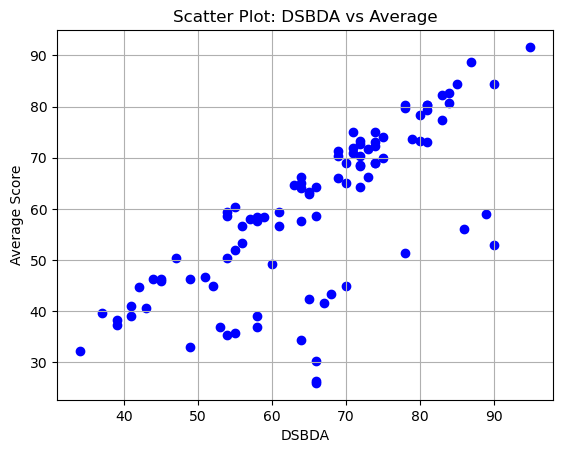

In [54]:
import matplotlib.pyplot as plt

# Scatter plot between DSBDA and Average
plt.scatter(clean_df["DSBDA"], clean_df["Average"], color='blue', marker='o')#We are plotting the scatter plot for DSBDA vs 
#Average Marks from the cleaned dataset(means dataset without outlier)
#we have choosen to show data points in form of small circles using marker='o' and color of these circles are blue

plt.title("Scatter Plot: DSBDA vs Average")
plt.xlabel("DSBDA")#On X axis marks of DSBDA are taken
plt.ylabel("Average Score")#On y axis Average Score is taken

plt.grid(True)#it is used to display grId lines on the plot
plt.show()